<a href="https://colab.research.google.com/github/Nisha40108/ADVANCED-MACHINE-LEARNING-64061-/blob/main/AML%20Assignment%201%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Assignment 1 - Neural Network - IMDB data set**
#**Name: Nisha Chaurasia**
#**Date: 09-21-2023**

######Using the IMDB data set from the library tensorflow.keras.dataset

In [64]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

In [6]:
train_data[0]
train_labels[0]
max([max(sequence) for sequence in train_data])

9999

######Decoding Reviews back to text

In [7]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

1641221/1641221 [==============================] - 1s 0us/step


######The dataset is vectorized here by Create an all-zero matrix of shape (len(sequences), dimension)

In [8]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results

######Vectorised Train & Test data

In [9]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

######Building Model using Relu function

In [10]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

######Compiling the model

In [11]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

######Validating your approach : Setting aside a validation set

In [12]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

######Training the model with batch size 512 and 20 epochs

In [13]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()

Epoch 1/20
30/30 [==============================] - 3s 72ms/step - loss: 0.5593 - accuracy: 0.7635 - val_loss: 0.4445 - val_accuracy: 0.8499
Epoch 2/20
30/30 [==============================] - 1s 18ms/step - loss: 0.3650 - accuracy: 0.8859 - val_loss: 0.3474 - val_accuracy: 0.8688
Epoch 3/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2754 - accuracy: 0.9079 - val_loss: 0.3031 - val_accuracy: 0.8830
Epoch 4/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2238 - accuracy: 0.9260 - val_loss: 0.2843 - val_accuracy: 0.8869
Epoch 5/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1885 - accuracy: 0.9367 - val_loss: 0.2899 - val_accuracy: 0.8826
Epoch 6/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1642 - accuracy: 0.9458 - val_loss: 0.3139 - val_accuracy: 0.8745
Epoch 7/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1422 - accuracy: 0.9535 - val_loss: 0.2848 - val_accuracy: 0.8837
Epoch 8/20
30

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

######Plotting graph between Training and Validation loss

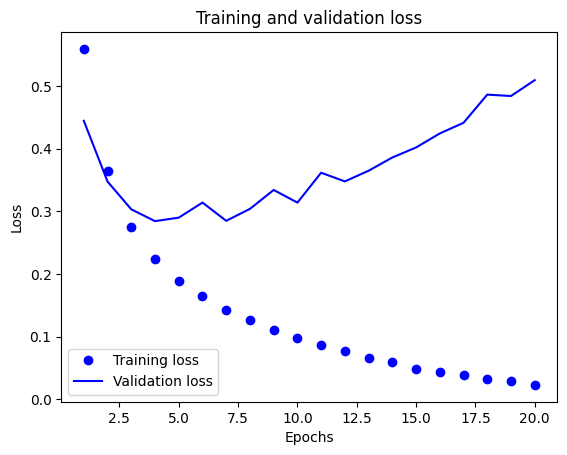

In [14]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

######Plotting graph between Training and Validation Accuracy

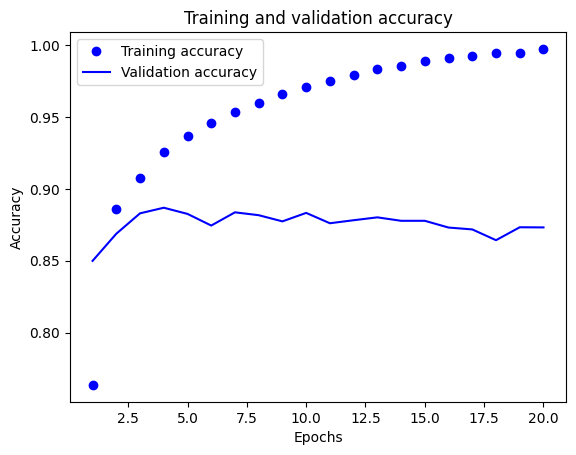

In [15]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

######Training the model from scratch - Model 1 Using epoches 4

In [16]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 12ms/step - loss: 0.4947 - accuracy: 0.8026
Epoch 2/4
49/49 [==============================] - 1s 12ms/step - loss: 0.2902 - accuracy: 0.8994
Epoch 3/4
49/49 [==============================] - 1s 11ms/step - loss: 0.2225 - accuracy: 0.9210
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.2898 - accuracy: 0.8834


In [17]:
results

[0.2897927761077881, 0.883400022983551]

######Using a train model to genereate prediction on new data

In [18]:
model.predict(x_test)

782/782 [==============================] - 2s 2ms/step


array([[0.19012444],
       [0.998428  ],
       [0.7574784 ],
       ...,
       [0.06516064],
       [0.04914958],
       [0.5090593 ]], dtype=float32)

######Training the model 2 using epoches 5

In [19]:
# Install Keras
!pip install keras

# Import Keras
import keras
from keras import layers

model_2 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_2.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model_2.fit(x_train, y_train, epochs=5, batch_size=512)
results = model_2.evaluate(x_test, y_test)

Epoch 1/5
49/49 [==============================] - 1s 11ms/step - loss: 0.4661 - accuracy: 0.8134
Epoch 2/5
49/49 [==============================] - 1s 11ms/step - loss: 0.2738 - accuracy: 0.9043
Epoch 3/5
49/49 [==============================] - 1s 11ms/step - loss: 0.2158 - accuracy: 0.9227
Epoch 4/5
49/49 [==============================] - 1s 11ms/step - loss: 0.1838 - accuracy: 0.9337
Epoch 5/5
782/782 [==============================] - 2s 2ms/step - loss: 0.2959 - accuracy: 0.8847


In [20]:
results

[0.29585403203964233, 0.8847200274467468]

###**1:Above used two hidden layers. Now using three hidden layers to see how doing so affects validation and test accuracy**

######Model 1.1 Trained with 3 layers

In [21]:
model_11 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_11.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history3 = model_11.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict3 = history3.history
history_dict3.keys()

Epoch 1/20
30/30 [==============================] - 3s 70ms/step - loss: 0.5511 - accuracy: 0.7523 - val_loss: 0.4005 - val_accuracy: 0.8583
Epoch 2/20
30/30 [==============================] - 1s 20ms/step - loss: 0.3245 - accuracy: 0.8879 - val_loss: 0.3348 - val_accuracy: 0.8628
Epoch 3/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2311 - accuracy: 0.9215 - val_loss: 0.2849 - val_accuracy: 0.8851
Epoch 4/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1843 - accuracy: 0.9370 - val_loss: 0.2932 - val_accuracy: 0.8810
Epoch 5/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1518 - accuracy: 0.9485 - val_loss: 0.2918 - val_accuracy: 0.8840
Epoch 6/20
30/30 [==============================] - 1s 17ms/step - loss: 0.1236 - accuracy: 0.9603 - val_loss: 0.3056 - val_accuracy: 0.8826
Epoch 7/20
30/30 [==============================] - 1s 17ms/step - loss: 0.1045 - accuracy: 0.9653 - val_loss: 0.3161 - val_accuracy: 0.8825
Epoch 8/20
30

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

######Plotting graph between Training and Validation loss

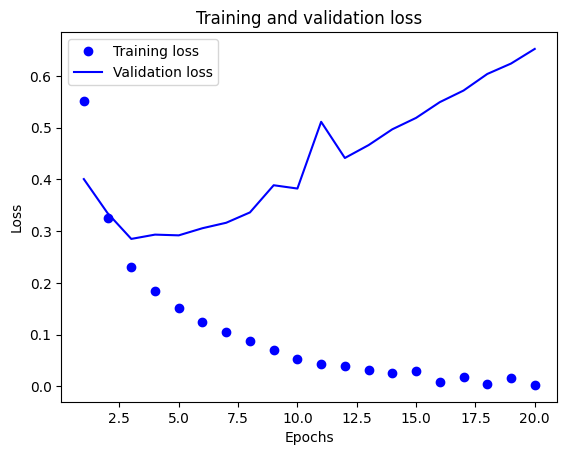

In [22]:
loss_values = history_dict3["loss"]
val_loss_values = history_dict3["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

######Plotting graph between Training and Validation accuracyplt.clf()

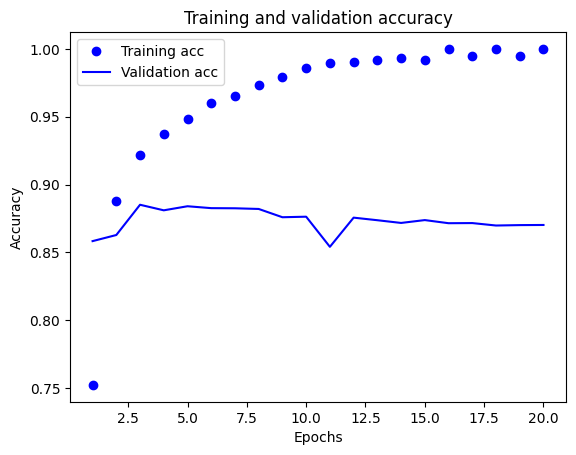

In [23]:
acc = history_dict3["accuracy"]
val_acc = history_dict3["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [24]:
model_11.fit(x_train, y_train, epochs=12, batch_size=512)
results_M11 = model.evaluate(x_test, y_test)
results_M11

Epoch 1/12
49/49 [==============================] - 1s 11ms/step - loss: 0.2186 - accuracy: 0.9448
Epoch 2/12
49/49 [==============================] - 1s 11ms/step - loss: 0.1257 - accuracy: 0.9622
Epoch 3/12
49/49 [==============================] - 1s 11ms/step - loss: 0.0912 - accuracy: 0.9726
Epoch 4/12
49/49 [==============================] - 1s 11ms/step - loss: 0.0656 - accuracy: 0.9807
Epoch 5/12
49/49 [==============================] - 1s 12ms/step - loss: 0.0503 - accuracy: 0.9867
Epoch 6/12
49/49 [==============================] - 1s 12ms/step - loss: 0.0377 - accuracy: 0.9901
Epoch 7/12
49/49 [==============================] - 1s 13ms/step - loss: 0.0272 - accuracy: 0.9933
Epoch 8/12
49/49 [==============================] - 1s 11ms/step - loss: 0.0185 - accuracy: 0.9956
Epoch 9/12
49/49 [==============================] - 1s 11ms/step - loss: 0.0163 - accuracy: 0.9954
Epoch 10/12
49/49 [==============================] - 1s 12ms/step - loss: 0.0138 - accuracy: 0.9961
Epoch 11/

[0.2897927761077881, 0.883400022983551]

######Model 1.2 Trained with 1 layers

In [25]:
model_12 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_12.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history4 = model_12.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict4 = history4.history
history_dict4.keys()

Epoch 1/20
30/30 [==============================] - 2s 44ms/step - loss: 0.5235 - accuracy: 0.7870 - val_loss: 0.4371 - val_accuracy: 0.8258
Epoch 2/20
30/30 [==============================] - 0s 16ms/step - loss: 0.3480 - accuracy: 0.8887 - val_loss: 0.3395 - val_accuracy: 0.8764
Epoch 3/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2773 - accuracy: 0.9095 - val_loss: 0.3017 - val_accuracy: 0.8859
Epoch 4/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2340 - accuracy: 0.9247 - val_loss: 0.2901 - val_accuracy: 0.8869
Epoch 5/20
30/30 [==============================] - 0s 17ms/step - loss: 0.2048 - accuracy: 0.9351 - val_loss: 0.2926 - val_accuracy: 0.8815
Epoch 6/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1822 - accuracy: 0.9429 - val_loss: 0.2754 - val_accuracy: 0.8882
Epoch 7/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1644 - accuracy: 0.9487 - val_loss: 0.2870 - val_accuracy: 0.8843
Epoch 8/20
30

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

######Plotting graph between Training and Validation loss

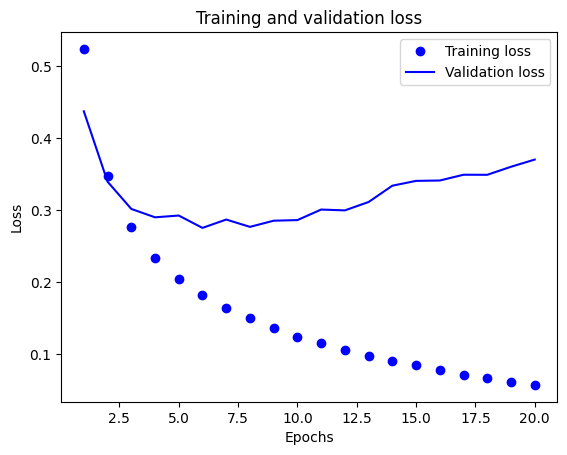

In [26]:
loss_values = history_dict4["loss"]
val_loss_values = history_dict4["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

######Plotting graph between Training and Validation accuracyplt.clf()

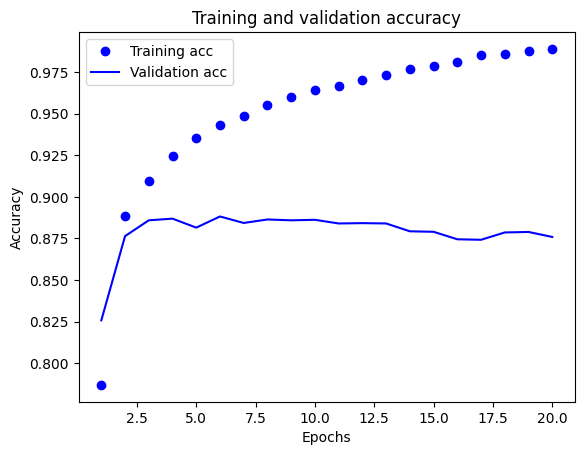

In [27]:
acc = history_dict4["accuracy"]
val_acc = history_dict4["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [28]:
model_12.fit(x_train, y_train, epochs=12, batch_size=512)
results_M12 = model.evaluate(x_test, y_test)
results_M12

Epoch 1/12
49/49 [==============================] - 1s 11ms/step - loss: 0.1766 - accuracy: 0.9449
Epoch 2/12
49/49 [==============================] - 1s 11ms/step - loss: 0.1449 - accuracy: 0.9532
Epoch 3/12
49/49 [==============================] - 1s 11ms/step - loss: 0.1281 - accuracy: 0.9583
Epoch 4/12
49/49 [==============================] - 1s 11ms/step - loss: 0.1159 - accuracy: 0.9626
Epoch 5/12
49/49 [==============================] - 1s 11ms/step - loss: 0.1054 - accuracy: 0.9669
Epoch 6/12
49/49 [==============================] - 1s 11ms/step - loss: 0.0977 - accuracy: 0.9701
Epoch 7/12
49/49 [==============================] - 1s 11ms/step - loss: 0.0907 - accuracy: 0.9713
Epoch 8/12
49/49 [==============================] - 1s 11ms/step - loss: 0.0843 - accuracy: 0.9752
Epoch 9/12
49/49 [==============================] - 1s 11ms/step - loss: 0.0784 - accuracy: 0.9768
Epoch 10/12
49/49 [==============================] - 1s 11ms/step - loss: 0.0735 - accuracy: 0.9787
Epoch 11/

[0.2897927761077881, 0.883400022983551]

###**2: Using layers with more hidden units or fewer hidden units: 32 units, 64 units, and so on.**

######Training the model with 32-Units

In [29]:
model_21 = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_21.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history21 = model_21.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict21 = history21.history
history_dict21.keys()

Epoch 1/20
30/30 [==============================] - 2s 48ms/step - loss: 0.5173 - accuracy: 0.7687 - val_loss: 0.3744 - val_accuracy: 0.8678
Epoch 2/20
30/30 [==============================] - 1s 20ms/step - loss: 0.3093 - accuracy: 0.8911 - val_loss: 0.3116 - val_accuracy: 0.8765
Epoch 3/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2297 - accuracy: 0.9191 - val_loss: 0.2943 - val_accuracy: 0.8800
Epoch 4/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1914 - accuracy: 0.9319 - val_loss: 0.2739 - val_accuracy: 0.8899
Epoch 5/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1557 - accuracy: 0.9483 - val_loss: 0.3206 - val_accuracy: 0.8766
Epoch 6/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1335 - accuracy: 0.9536 - val_loss: 0.2917 - val_accuracy: 0.8856
Epoch 7/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1112 - accuracy: 0.9639 - val_loss: 0.3122 - val_accuracy: 0.8839
Epoch 8/20
30

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

######Plotting graph between Training and Validation loss

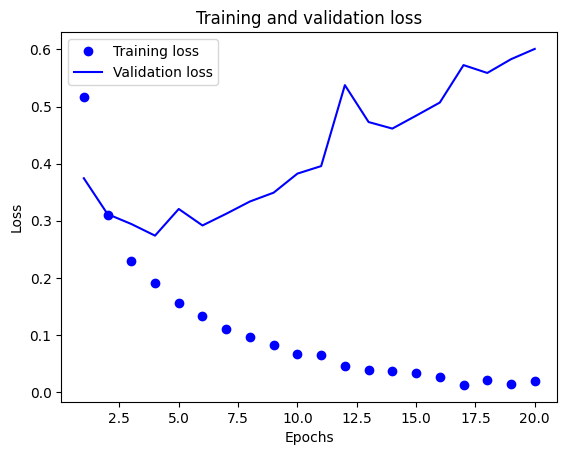

In [30]:
loss_values = history_dict21["loss"]
val_loss_values = history_dict21["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

######Plotting graph between Training and Validation accuracy

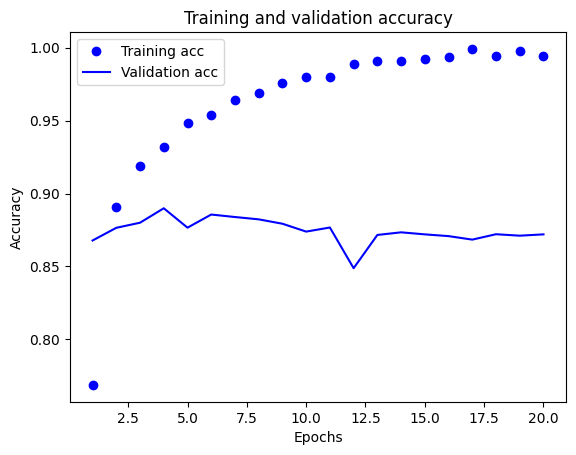

In [31]:
plt.clf()
acc = history_dict21["accuracy"]
val_acc = history_dict21["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [32]:
model_21.fit(x_train, y_train, epochs=8, batch_size=512)
results_M21 = model_21.evaluate(x_test, y_test)
results_M21

Epoch 1/8
49/49 [==============================] - 1s 13ms/step - loss: 0.1901 - accuracy: 0.9473
Epoch 2/8
49/49 [==============================] - 1s 14ms/step - loss: 0.1203 - accuracy: 0.9631
Epoch 3/8
49/49 [==============================] - 1s 14ms/step - loss: 0.0891 - accuracy: 0.9727
Epoch 4/8
49/49 [==============================] - 1s 14ms/step - loss: 0.0649 - accuracy: 0.9811
Epoch 5/8
49/49 [==============================] - 1s 14ms/step - loss: 0.0469 - accuracy: 0.9868
Epoch 6/8
49/49 [==============================] - 1s 15ms/step - loss: 0.0305 - accuracy: 0.9922
Epoch 7/8
49/49 [==============================] - 1s 14ms/step - loss: 0.0264 - accuracy: 0.9930
Epoch 8/8
782/782 [==============================] - 2s 2ms/step - loss: 0.6089 - accuracy: 0.8618


[0.6089290380477905, 0.861840009689331]

######Training the model with 64-Units

In [33]:
model_22 = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_22.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history22 = model_22.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict22 = history22.history
history_dict22.keys()

Epoch 1/20
30/30 [==============================] - 2s 58ms/step - loss: 0.5149 - accuracy: 0.7481 - val_loss: 0.3504 - val_accuracy: 0.8666
Epoch 2/20
30/30 [==============================] - 1s 28ms/step - loss: 0.2909 - accuracy: 0.8919 - val_loss: 0.3729 - val_accuracy: 0.8407
Epoch 3/20
30/30 [==============================] - 1s 27ms/step - loss: 0.2240 - accuracy: 0.9132 - val_loss: 0.2779 - val_accuracy: 0.8897
Epoch 4/20
30/30 [==============================] - 1s 27ms/step - loss: 0.1769 - accuracy: 0.9331 - val_loss: 0.4696 - val_accuracy: 0.8190
Epoch 5/20
30/30 [==============================] - 1s 29ms/step - loss: 0.1553 - accuracy: 0.9430 - val_loss: 0.2885 - val_accuracy: 0.8873
Epoch 6/20
30/30 [==============================] - 1s 28ms/step - loss: 0.1169 - accuracy: 0.9603 - val_loss: 0.3564 - val_accuracy: 0.8735
Epoch 7/20
30/30 [==============================] - 1s 29ms/step - loss: 0.1079 - accuracy: 0.9603 - val_loss: 0.3212 - val_accuracy: 0.8824
Epoch 8/20
30

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

######Plotting graph between Training and Validation loss

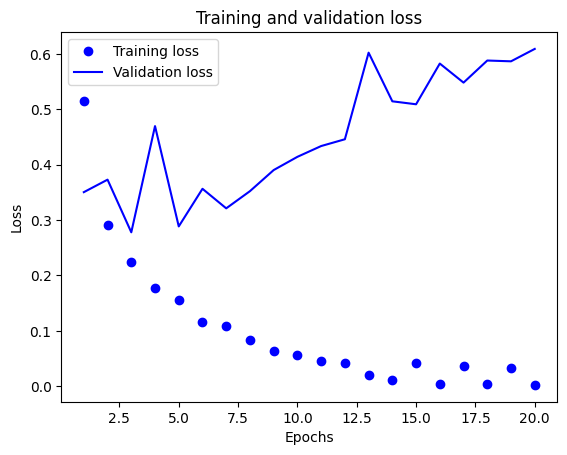

In [34]:
loss_values = history_dict22["loss"]
val_loss_values = history_dict22["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

######Plotting graph between Training and Validation accuracy

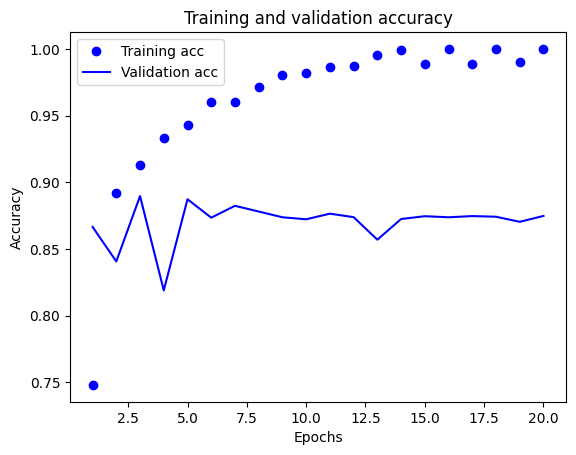

In [35]:
plt.clf()
acc = history_dict22["accuracy"]
val_acc = history_dict22["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [36]:
model_22.fit(x_train, y_train, epochs=8, batch_size=512)
results_M22 = model_22.evaluate(x_test, y_test)
results_M22

Epoch 1/8
49/49 [==============================] - 1s 20ms/step - loss: 0.1695 - accuracy: 0.9475
Epoch 2/8
49/49 [==============================] - 1s 20ms/step - loss: 0.0952 - accuracy: 0.9705
Epoch 3/8
49/49 [==============================] - 1s 20ms/step - loss: 0.0592 - accuracy: 0.9835
Epoch 4/8
49/49 [==============================] - 1s 20ms/step - loss: 0.0364 - accuracy: 0.9904
Epoch 5/8
49/49 [==============================] - 1s 20ms/step - loss: 0.0211 - accuracy: 0.9949
Epoch 6/8
49/49 [==============================] - 1s 21ms/step - loss: 0.0174 - accuracy: 0.9945
Epoch 7/8
49/49 [==============================] - 1s 22ms/step - loss: 0.0109 - accuracy: 0.9970
Epoch 8/8
782/782 [==============================] - 2s 2ms/step - loss: 0.5534 - accuracy: 0.8663


[0.5533949732780457, 0.866320013999939]

######Training the model with 128-Units

In [37]:
model_23 = keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_23.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history23 = model_23.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict23 = history23.history
history_dict23.keys()

Epoch 1/20
30/30 [==============================] - 3s 67ms/step - loss: 0.5194 - accuracy: 0.7545 - val_loss: 0.3690 - val_accuracy: 0.8463
Epoch 2/20
30/30 [==============================] - 1s 38ms/step - loss: 0.3023 - accuracy: 0.8783 - val_loss: 0.3266 - val_accuracy: 0.8630
Epoch 3/20
30/30 [==============================] - 1s 38ms/step - loss: 0.2374 - accuracy: 0.9054 - val_loss: 0.3175 - val_accuracy: 0.8687
Epoch 4/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1916 - accuracy: 0.9249 - val_loss: 0.2813 - val_accuracy: 0.8842
Epoch 5/20
30/30 [==============================] - 1s 38ms/step - loss: 0.1427 - accuracy: 0.9462 - val_loss: 0.3018 - val_accuracy: 0.8780
Epoch 6/20
30/30 [==============================] - 1s 40ms/step - loss: 0.1103 - accuracy: 0.9605 - val_loss: 0.3218 - val_accuracy: 0.8831
Epoch 7/20
30/30 [==============================] - 1s 41ms/step - loss: 0.0828 - accuracy: 0.9726 - val_loss: 0.3422 - val_accuracy: 0.8838
Epoch 8/20
30

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

######Plotting graph between Training and Validation loss

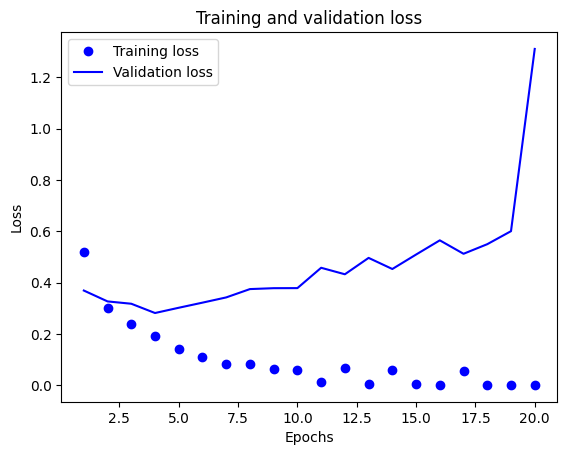

In [38]:
loss_values = history_dict23["loss"]
val_loss_values = history_dict23["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

######Plotting graph between Training and Validation accuracy

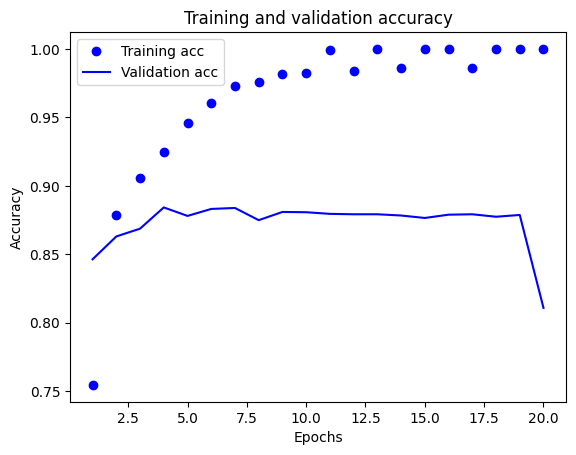

In [39]:
plt.clf()
acc = history_dict23["accuracy"]
val_acc = history_dict23["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [40]:
model_23.fit(x_train, y_train, epochs=8, batch_size=512)
results_M23 = model_23.evaluate(x_test, y_test)
results_M23

Epoch 1/8
49/49 [==============================] - 1s 28ms/step - loss: 0.2007 - accuracy: 0.9436
Epoch 2/8
49/49 [==============================] - 1s 28ms/step - loss: 0.0866 - accuracy: 0.9736
Epoch 3/8
49/49 [==============================] - 1s 29ms/step - loss: 0.0457 - accuracy: 0.9866
Epoch 4/8
49/49 [==============================] - 1s 30ms/step - loss: 0.0293 - accuracy: 0.9915
Epoch 5/8
49/49 [==============================] - 1s 28ms/step - loss: 0.0282 - accuracy: 0.9916
Epoch 6/8
49/49 [==============================] - 1s 28ms/step - loss: 0.0041 - accuracy: 0.9992
Epoch 7/8
49/49 [==============================] - 1s 28ms/step - loss: 0.0212 - accuracy: 0.9941
Epoch 8/8
782/782 [==============================] - 2s 3ms/step - loss: 0.5000 - accuracy: 0.8746


[0.5000447630882263, 0.8745999932289124]

###**3: Using the mse loss function instead of binary_crossentropy**

In [41]:
model_MSE = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_MSE.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])
history_model_MSE = model_MSE.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict_MSE = history_model_MSE.history
history_dict_MSE.keys()

Epoch 1/20
30/30 [==============================] - 2s 59ms/step - loss: 0.1933 - accuracy: 0.7573 - val_loss: 0.1423 - val_accuracy: 0.8536
Epoch 2/20
30/30 [==============================] - 1s 17ms/step - loss: 0.1140 - accuracy: 0.8821 - val_loss: 0.1059 - val_accuracy: 0.8758
Epoch 3/20
30/30 [==============================] - 0s 16ms/step - loss: 0.0849 - accuracy: 0.9087 - val_loss: 0.0943 - val_accuracy: 0.8799
Epoch 4/20
30/30 [==============================] - 0s 16ms/step - loss: 0.0692 - accuracy: 0.9243 - val_loss: 0.0917 - val_accuracy: 0.8779
Epoch 5/20
30/30 [==============================] - 0s 17ms/step - loss: 0.0596 - accuracy: 0.9337 - val_loss: 0.0858 - val_accuracy: 0.8850
Epoch 6/20
30/30 [==============================] - 0s 16ms/step - loss: 0.0512 - accuracy: 0.9444 - val_loss: 0.0973 - val_accuracy: 0.8677
Epoch 7/20
30/30 [==============================] - 0s 16ms/step - loss: 0.0466 - accuracy: 0.9495 - val_loss: 0.0890 - val_accuracy: 0.8803
Epoch 8/20
30

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

######Plotting graph between Training and Validation loss

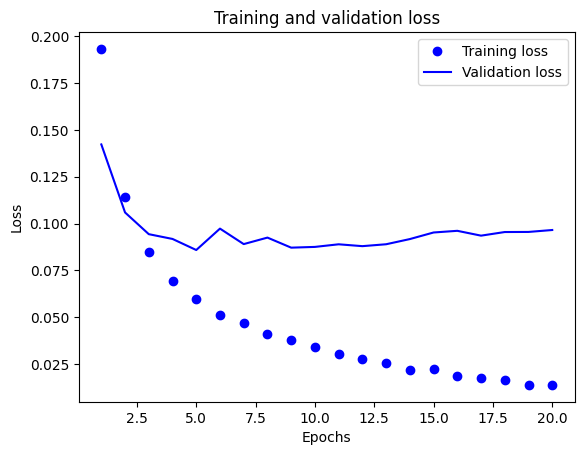

In [42]:
loss_values = history_dict_MSE["loss"]
val_loss_values = history_dict_MSE["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

######Plotting graph between Training and Validation accuracy

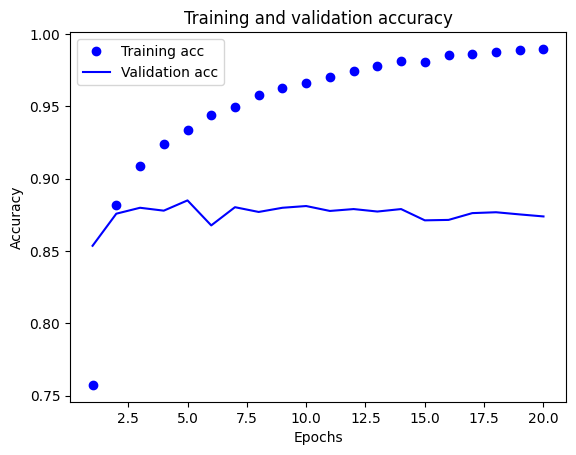

In [43]:
plt.clf()
acc = history_dict_MSE["accuracy"]
val_acc = history_dict_MSE["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [44]:
model_MSE.fit(x_train, y_train, epochs=8, batch_size=512)
results_MSE = model_MSE.evaluate(x_test, y_test)
results_MSE

Epoch 1/8
49/49 [==============================] - 1s 11ms/step - loss: 0.0468 - accuracy: 0.9442
Epoch 2/8
49/49 [==============================] - 1s 11ms/step - loss: 0.0392 - accuracy: 0.9549
Epoch 3/8
49/49 [==============================] - 1s 11ms/step - loss: 0.0337 - accuracy: 0.9631
Epoch 4/8
49/49 [==============================] - 1s 12ms/step - loss: 0.0318 - accuracy: 0.9659
Epoch 5/8
49/49 [==============================] - 1s 11ms/step - loss: 0.0287 - accuracy: 0.9698
Epoch 6/8
49/49 [==============================] - 1s 12ms/step - loss: 0.0258 - accuracy: 0.9740
Epoch 7/8
49/49 [==============================] - 1s 11ms/step - loss: 0.0242 - accuracy: 0.9761
Epoch 8/8
782/782 [==============================] - 2s 2ms/step - loss: 0.1077 - accuracy: 0.8649


[0.1076655164361, 0.8648800253868103]

###**4:Using the tanh activation (an activation that was popular in the early days of neural networks) instead of relu**

######Training the model using Tanh Activation Function

In [45]:
model_tanh = keras.Sequential([
    layers.Dense(16, activation="tanh"),
    layers.Dense(16, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])
model_tanh.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_model_tanh = model_tanh.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict_tanh = history_model_tanh.history
history_dict_tanh.keys()

Epoch 1/20
30/30 [==============================] - 2s 57ms/step - loss: 0.4931 - accuracy: 0.7901 - val_loss: 0.3751 - val_accuracy: 0.8643
Epoch 2/20
30/30 [==============================] - 0s 15ms/step - loss: 0.2941 - accuracy: 0.8979 - val_loss: 0.2914 - val_accuracy: 0.8861
Epoch 3/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2151 - accuracy: 0.9231 - val_loss: 0.2864 - val_accuracy: 0.8799
Epoch 4/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1681 - accuracy: 0.9434 - val_loss: 0.2787 - val_accuracy: 0.8829
Epoch 5/20
30/30 [==============================] - 1s 17ms/step - loss: 0.1328 - accuracy: 0.9565 - val_loss: 0.2996 - val_accuracy: 0.8798
Epoch 6/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1059 - accuracy: 0.9661 - val_loss: 0.3787 - val_accuracy: 0.8662
Epoch 7/20
30/30 [==============================] - 0s 16ms/step - loss: 0.0894 - accuracy: 0.9697 - val_loss: 0.3494 - val_accuracy: 0.8766
Epoch 8/20
30

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

######Plotting graph between Training and Validation loss

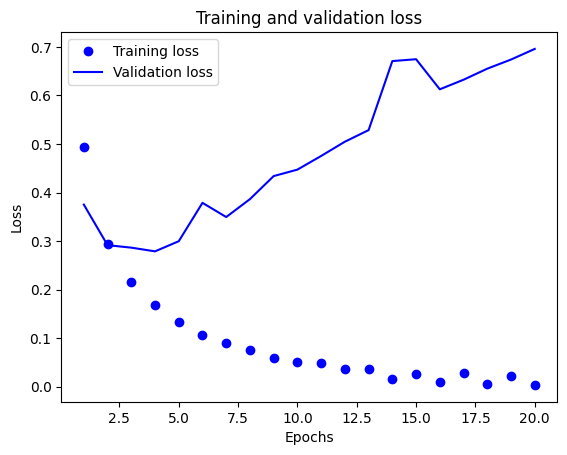

In [46]:
loss_values = history_dict_tanh["loss"]
val_loss_values = history_dict_tanh["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

######Plotting graph between Training and Validation accuracy

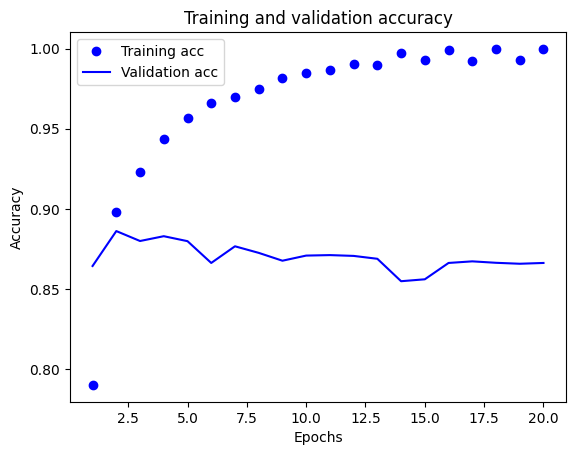

In [47]:
plt.clf()
acc = history_dict_tanh["accuracy"]
val_acc = history_dict_tanh["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [48]:
model_tanh.fit(x_train, y_train, epochs=8, batch_size=512)
results_tanh = model_tanh.evaluate(x_test, y_test)
results_tanh

Epoch 1/8
49/49 [==============================] - 1s 11ms/step - loss: 0.2576 - accuracy: 0.9427
Epoch 2/8
49/49 [==============================] - 1s 11ms/step - loss: 0.1414 - accuracy: 0.9585
Epoch 3/8
49/49 [==============================] - 1s 12ms/step - loss: 0.1185 - accuracy: 0.9630
Epoch 4/8
49/49 [==============================] - 1s 12ms/step - loss: 0.0980 - accuracy: 0.9693
Epoch 5/8
49/49 [==============================] - 1s 11ms/step - loss: 0.0840 - accuracy: 0.9728
Epoch 6/8
49/49 [==============================] - 1s 11ms/step - loss: 0.0743 - accuracy: 0.9772
Epoch 7/8
49/49 [==============================] - 1s 11ms/step - loss: 0.0680 - accuracy: 0.9783
Epoch 8/8
782/782 [==============================] - 2s 2ms/step - loss: 0.6066 - accuracy: 0.8541


[0.6066409349441528, 0.8540800213813782]

###**5:Using regularization, dropout,etc technique we studied in class to get the model perform better on validation**

######5.1:Regularization : Using L2 regularization (also known as weight decay)

In [50]:
from tensorflow.keras import regularizers
model_regularisation = keras.Sequential([
    layers.Dense(16, activation="relu",kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(16, activation="relu",kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(1, activation="sigmoid")
])
model_regularisation.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_model_regularisation = model_regularisation.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict_regularisation = history_model_regularisation.history
history_dict_regularisation.keys()

Epoch 1/20
30/30 [==============================] - 2s 48ms/step - loss: 0.6217 - accuracy: 0.7407 - val_loss: 0.5015 - val_accuracy: 0.8244
Epoch 2/20
30/30 [==============================] - 0s 16ms/step - loss: 0.4123 - accuracy: 0.8807 - val_loss: 0.3851 - val_accuracy: 0.8796
Epoch 3/20
30/30 [==============================] - 0s 16ms/step - loss: 0.3172 - accuracy: 0.9110 - val_loss: 0.3667 - val_accuracy: 0.8679
Epoch 4/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2705 - accuracy: 0.9242 - val_loss: 0.3450 - val_accuracy: 0.8801
Epoch 5/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2383 - accuracy: 0.9373 - val_loss: 0.3329 - val_accuracy: 0.8873
Epoch 6/20
30/30 [==============================] - 1s 18ms/step - loss: 0.2216 - accuracy: 0.9422 - val_loss: 0.3310 - val_accuracy: 0.8831
Epoch 7/20
30/30 [==============================] - 0s 15ms/step - loss: 0.2036 - accuracy: 0.9493 - val_loss: 0.3373 - val_accuracy: 0.8826
Epoch 8/20
30

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Plotting graph between Training and Validation loss

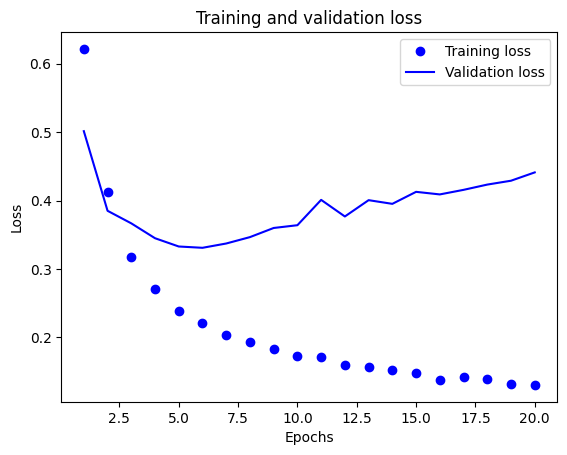

In [51]:
loss_values = history_dict_regularisation["loss"]
val_loss_values = history_dict_regularisation["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

######Plotting graph between Training and Validation accuracy

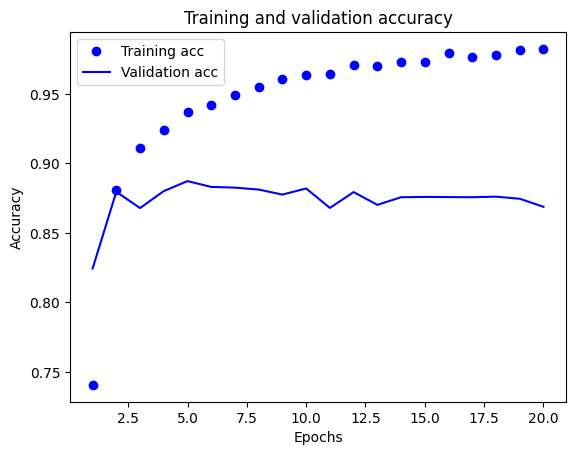

In [52]:
plt.clf()
acc = history_dict_regularisation["accuracy"]
val_acc = history_dict_regularisation["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [53]:
model_regularisation.fit(x_train, y_train, epochs=8, batch_size=512)
results_regularisation = model_regularisation.evaluate(x_test, y_test)
results_regularisation

Epoch 1/8
49/49 [==============================] - 1s 14ms/step - loss: 0.2474 - accuracy: 0.9366
Epoch 2/8
49/49 [==============================] - 1s 12ms/step - loss: 0.2067 - accuracy: 0.9486
Epoch 3/8
49/49 [==============================] - 1s 11ms/step - loss: 0.1891 - accuracy: 0.9542
Epoch 4/8
49/49 [==============================] - 1s 12ms/step - loss: 0.1789 - accuracy: 0.9578
Epoch 5/8
49/49 [==============================] - 1s 12ms/step - loss: 0.1737 - accuracy: 0.9611
Epoch 6/8
49/49 [==============================] - 1s 11ms/step - loss: 0.1668 - accuracy: 0.9634
Epoch 7/8
49/49 [==============================] - 1s 12ms/step - loss: 0.1601 - accuracy: 0.9678
Epoch 8/8
782/782 [==============================] - 2s 2ms/step - loss: 0.4337 - accuracy: 0.8690


[0.4336990714073181, 0.8689600229263306]

###### 5.2: dropout-layers.Dropout(0.5)

In [54]:
from tensorflow.keras import regularizers
model_Dropout = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model_Dropout.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_model_Dropout = model_Dropout.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict_Dropout = history_model_Dropout.history
history_dict_Dropout.keys()

Epoch 1/20
30/30 [==============================] - 2s 47ms/step - loss: 0.6393 - accuracy: 0.6317 - val_loss: 0.5579 - val_accuracy: 0.8364
Epoch 2/20
30/30 [==============================] - 1s 18ms/step - loss: 0.5316 - accuracy: 0.7543 - val_loss: 0.4369 - val_accuracy: 0.8632
Epoch 3/20
30/30 [==============================] - 1s 17ms/step - loss: 0.4497 - accuracy: 0.8139 - val_loss: 0.3598 - val_accuracy: 0.8795
Epoch 4/20
30/30 [==============================] - 1s 17ms/step - loss: 0.3843 - accuracy: 0.8477 - val_loss: 0.3152 - val_accuracy: 0.8860
Epoch 5/20
30/30 [==============================] - 0s 16ms/step - loss: 0.3322 - accuracy: 0.8767 - val_loss: 0.2975 - val_accuracy: 0.8861
Epoch 6/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2949 - accuracy: 0.8991 - val_loss: 0.2795 - val_accuracy: 0.8880
Epoch 7/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2593 - accuracy: 0.9135 - val_loss: 0.2889 - val_accuracy: 0.8880
Epoch 8/20
30

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

######Plotting graph between Training and Validation loss

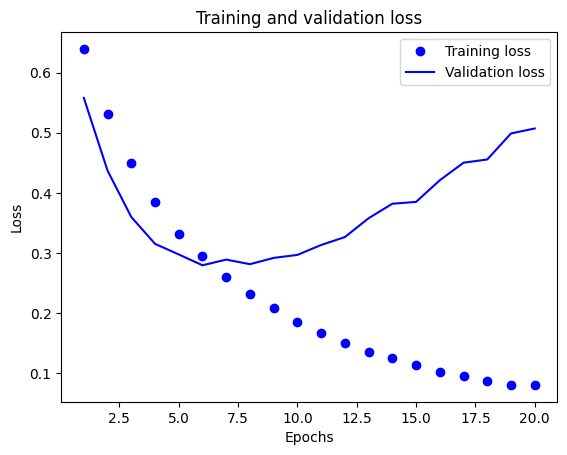

In [55]:
loss_values = history_dict_Dropout["loss"]
val_loss_values = history_dict_Dropout["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

######Plotting graph between Training and Validation accuracy

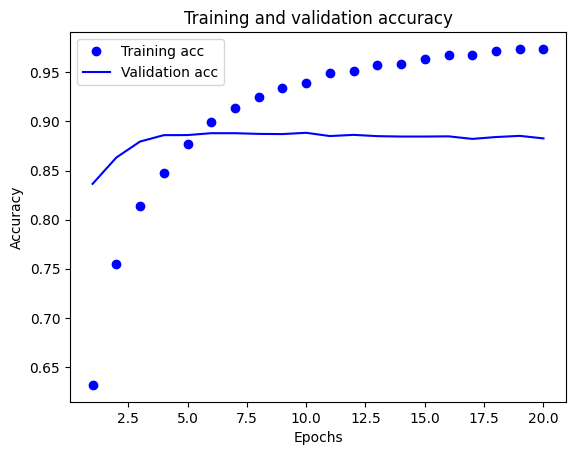

In [56]:
plt.clf()
acc = history_dict_Dropout["accuracy"]
val_acc = history_dict_Dropout["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [57]:
model_Dropout.fit(x_train, y_train, epochs=8, batch_size=512)
results_Dropout = model_Dropout.evaluate(x_test, y_test)
results_Dropout

Epoch 1/8
49/49 [==============================] - 1s 11ms/step - loss: 0.2492 - accuracy: 0.9250
Epoch 2/8
49/49 [==============================] - 1s 11ms/step - loss: 0.2081 - accuracy: 0.9348
Epoch 3/8
49/49 [==============================] - 1s 13ms/step - loss: 0.1729 - accuracy: 0.9412
Epoch 4/8
49/49 [==============================] - 1s 12ms/step - loss: 0.1636 - accuracy: 0.9451
Epoch 5/8
49/49 [==============================] - 1s 12ms/step - loss: 0.1504 - accuracy: 0.9488
Epoch 6/8
49/49 [==============================] - 1s 11ms/step - loss: 0.1429 - accuracy: 0.9480
Epoch 7/8
49/49 [==============================] - 1s 12ms/step - loss: 0.1337 - accuracy: 0.9529
Epoch 8/8
782/782 [==============================] - 2s 2ms/step - loss: 0.4793 - accuracy: 0.8712


[0.4793325364589691, 0.8711599707603455]

######Training the model with Hypertunned Parameters mentioned above

In [58]:
from tensorflow.keras import regularizers
model_Hyper = keras.Sequential([
    layers.Dense(32, activation="relu",kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dropout(0.5),
    layers.Dense(32, activation="relu",kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu",kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model_Hyper.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])
history_model_Hyper = model_Hyper.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict_Hyper = history_model_Hyper.history
history_dict_Hyper.keys()

Epoch 1/20
30/30 [==============================] - 4s 50ms/step - loss: 0.2555 - accuracy: 0.5567 - val_loss: 0.2301 - val_accuracy: 0.8024
Epoch 2/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2197 - accuracy: 0.6901 - val_loss: 0.1662 - val_accuracy: 0.8545
Epoch 3/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1769 - accuracy: 0.7805 - val_loss: 0.1271 - val_accuracy: 0.8715
Epoch 4/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1444 - accuracy: 0.8315 - val_loss: 0.1101 - val_accuracy: 0.8743
Epoch 5/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1219 - accuracy: 0.8635 - val_loss: 0.0985 - val_accuracy: 0.8850
Epoch 6/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1029 - accuracy: 0.8856 - val_loss: 0.0973 - val_accuracy: 0.8854
Epoch 7/20
30/30 [==============================] - 1s 20ms/step - loss: 0.0895 - accuracy: 0.9093 - val_loss: 0.0990 - val_accuracy: 0.8852
Epoch 8/20
30

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

######Plotting graph between Training and Validation loss

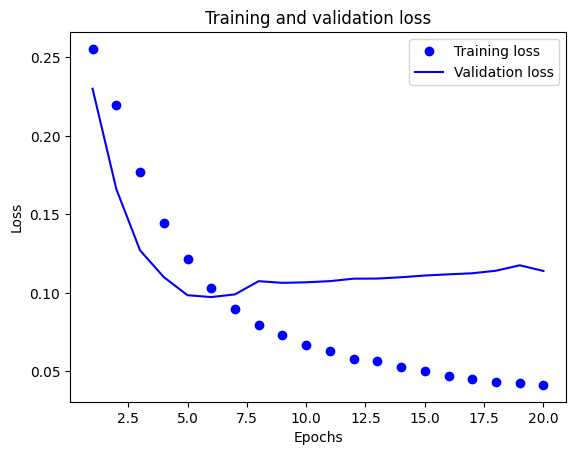

In [59]:
loss_values = history_dict_Hyper["loss"]
val_loss_values = history_dict_Hyper["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

######Plotting graph between Training and Validation accuracy

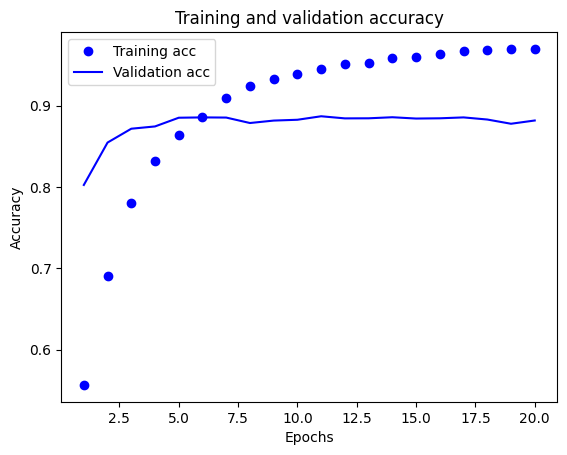

In [60]:
plt.clf()
acc = history_dict_Hyper["accuracy"]
val_acc = history_dict_Hyper["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [61]:
model_Hyper.fit(x_train, y_train, epochs=8, batch_size=512)
results_Hyper = model_Hyper.evaluate(x_test, y_test)
results_Hyper

Epoch 1/8
49/49 [==============================] - 1s 15ms/step - loss: 0.0733 - accuracy: 0.9297
Epoch 2/8
49/49 [==============================] - 1s 14ms/step - loss: 0.0674 - accuracy: 0.9374
Epoch 3/8
49/49 [==============================] - 1s 15ms/step - loss: 0.0637 - accuracy: 0.9416
Epoch 4/8
49/49 [==============================] - 1s 15ms/step - loss: 0.0595 - accuracy: 0.9468
Epoch 5/8
49/49 [==============================] - 1s 15ms/step - loss: 0.0572 - accuracy: 0.9488
Epoch 6/8
49/49 [==============================] - 1s 15ms/step - loss: 0.0547 - accuracy: 0.9526
Epoch 7/8
49/49 [==============================] - 1s 15ms/step - loss: 0.0525 - accuracy: 0.9546
Epoch 8/8
782/782 [==============================] - 2s 2ms/step - loss: 0.1124 - accuracy: 0.8833


[0.11244025081396103, 0.8832799792289734]

###**Summary of all models**



In [62]:
All_Loss= np.array([results_M11[0],results_M12[0],results_M21[0],results_M22[0],results_MSE[0],results_tanh[0],results_regularisation[0],results_Dropout[0],results_Hyper[0]])*100
All_Loss
All_Accuracy= np.array([results_M11[1],results_M12[1],results_M21[1],results_M22[1],results_MSE[1],results_tanh[1],results_regularisation[1],results_Dropout[1],results_Hyper[1]])*100
All_Accuracy
Labels=['Model_11','Model_12','Model_21','Model_22','Model_MSE','model_tanh','model_regularisation','Model_Dropout','Model_Hyper']
plt.clf()

<Figure size 640x480 with 0 Axes>

###**Comparing all models using graph**

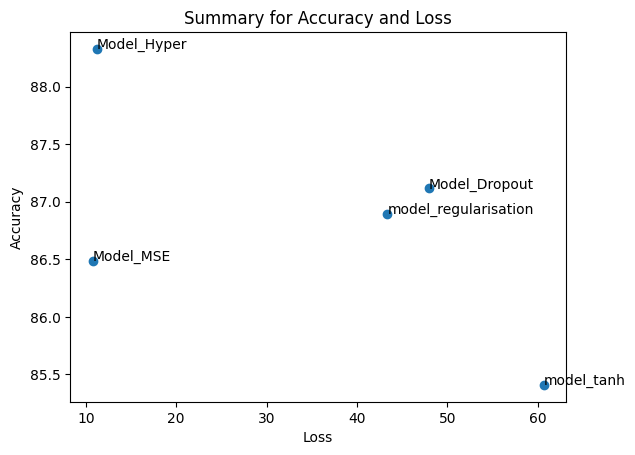

In [63]:
fig, ax = plt.subplots()
ax.scatter(All_Loss,All_Accuracy)
for i, txt in enumerate(Labels):
    ax.annotate(txt, (All_Loss[i],All_Accuracy[i] ))
plt.title("Summary for Accuracy and Loss")
plt.ylabel("Accuracy")
plt.xlabel("Loss")

plt.show()

##**Summary:**

uehufcbdjcfhdhedlkdjmsldxjeifrknfdcdiofcujdcnd